# Linear Regression Machine Learning for Stock Market Prediction

## This predicts future returns (see trend line below)


## Dependent Variable: Log Return on the day
## Independent Varaible: Prior n days returns

In [297]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style, dates
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [321]:
#Function to dynamically create the returns of the n previous days.
#A column is then added for each previous day.

def prior_days_returns(df, priorDays):
    names = []
    for i in range(1, priorDays, +1):
        df['Prior Day ' + str(i) + ' Return'] = df['Return'].shift(i)
        names.append('Prior Day ' + str(i) + ' Return')
    return names

In [431]:
#Read the Apple CSV file and set the index as the date column.

df = pd.read_csv('AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [432]:
#Calculate the log returns and insert the returns into a new column.

df['Return'] = np.log(df.Close.pct_change() + 1)

# Get the previous 650 days only and drop the Adjusted Close column.
df = df.tail(300)
df.drop('Adj Close', axis=1, inplace=True)

In [433]:
#Call the prior_days_returns to create the prior day returns for each row.

prior_days_name = prior_days_returns(df, 5)

#Drop all rows with any NA values. This is cleaning the data.
df.dropna(inplace=True)
df

Open        High         Low       Close     Volume  \
Date                                                                    
2021-04-19  133.509995  135.470001  133.339996  134.839996   94264200   
2021-04-20  135.020004  135.529999  131.809998  133.110001   94812300   
2021-04-21  132.360001  133.750000  131.300003  133.500000   68847100   
2021-04-22  133.039993  134.149994  131.410004  131.940002   84566500   
2021-04-23  132.160004  135.119995  132.160004  134.320007   78657500   
...                ...         ...         ...         ...        ...   
2022-06-13  132.869995  135.199997  131.440002  131.880005  122207100   
2022-06-14  133.130005  133.889999  131.479996  132.759995   84784300   
2022-06-15  134.289993  137.339996  132.160004  135.429993   91533000   
2022-06-16  132.080002  132.389999  129.039993  130.059998  108123900   
2022-06-17  130.070007  133.080002  129.809998  131.559998  134118500   

              Return  Prior Day 1 Return  Prior Day 2 Return  \
Date                                                           
2021-04-19  0.005056           -0.002531            0.018535   
2021-04-20 -0.012913            0.005056           -0.002531   
2021-04-21  0.002926           -0.012913            0.005056   
2021-04-22 -0.011754            0.002926           -0.012913   
2021-04-23  0.017878           -0.011754            0.002926   
...              ...                 ...                 ...   
2022-06-13 -0.039037           -0.039395           -0.036618   
2022-06-14  0.006650           -0.039037           -0.039395   
2022-06-15  0.019912            0.006650           -0.039037   
2022-06-16 -0.040459            0.019912            0.006650   
2022-06-17  0.011467           -0.040459            0.019912   

            Prior Day 3 Return  Prior Day 4 Return  
Date                                                
2021-04-19           -0.018014            0.024016  
2021-04-20            0.018535           -0.018014  
2021-04-21           -0.002531            0.018535  
2021-04-22            0.005056           -0.002531  
2021-04-23           -0.012913            0.005056  
...                        ...                 ...  
2022-06-13           -0.005056            0.017433  
2022-06-14           -0.036618           -0.005056  
2022-06-15           -0.039395           -0.036618  
2022-06-16           -0.039037           -0.039395  
2022-06-17            0.006650           -0.039037  

[296 rows x 10 columns]

In [434]:
train,test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)

In [435]:
#Define the model with LinearRegression.

model = linear_model.LinearRegression()



train,test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)

model.fit(train[prior_days_name], train['Return'])


#Fit the model on the dataframe column of the generate prior day returns and log return column.
#model.fit(df[prior_days_name], df['Return'])

LinearRegression()

In [436]:
#Create a column for the predicted linear regression.
#Prediction is done from the independent variables of prior day returns.

test['prediction_LR'] = model.predict(test[prior_days_name])

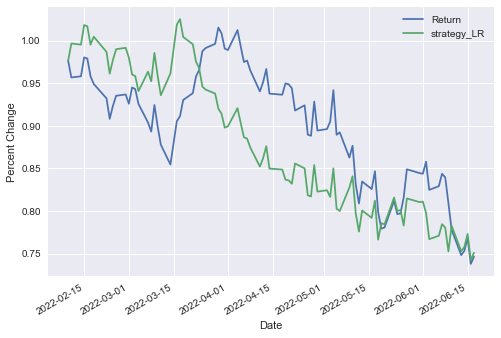

In [437]:
#Create a direction linear regression column.
#If the predicted value is larger than 1 then it will be purchased, if less than 0, then we will short the stock.

test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

#Create a strategy column to display the return of our predictions.
#This is given from multiplying the direction column by the actual daily log return.

test['strategy_LR'] = test['direction_LR'] * test['Return']

#Take the exponent of both the Return and strategy column since the return column is log.
#Plot the cumulative sum to display our predicted returns against our predicted returns.

return_plot = np.exp(test[['Return', 'strategy_LR']].cumsum()).plot()
return_plot.set_ylabel('Percent Change')
plt.show()

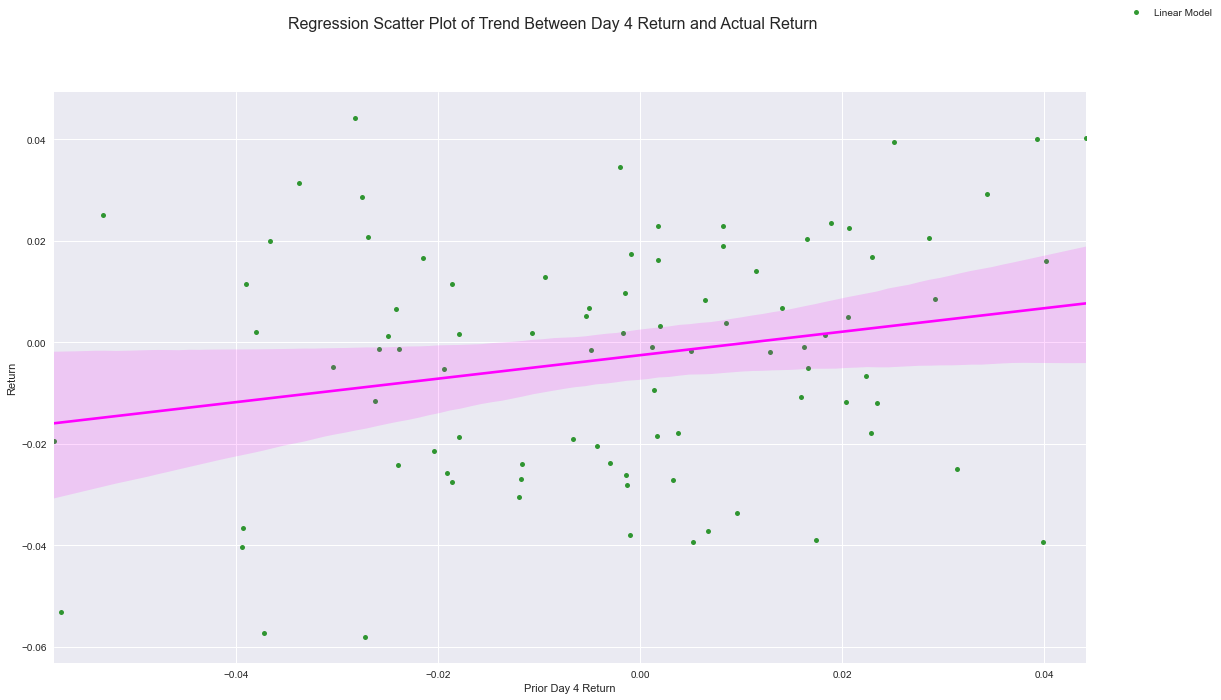

In [459]:
#Create a regression scatter plot to show a trend between our dependent variable (return) 
#and our independent varaible (prior day 4 return)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Regression Scatter Plot of Trend Between Day 4 Return and Actual Return', fontsize=16)

sns.regplot(data=test, x='Prior Day 4 Return', y='Return', 
            color='magenta', scatter_kws={'s': 25, "color": "green"}, label='Linear Model', 
            scatter=True)
fig.legend()
plt.show()

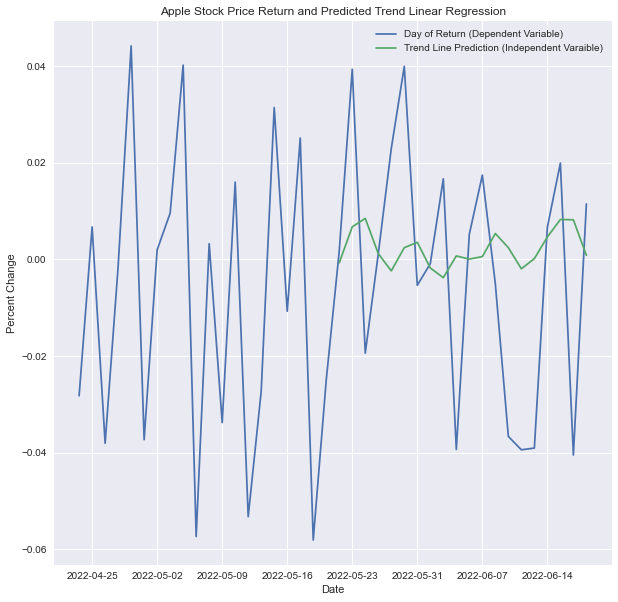

In [199]:
#Create a new dataframe from the return column and predicted linear regression.
#Only take the previous 20 rows of the return and predicted linear regression columns.

data = pd.DataFrame(index=test.index, data={'Day of Return (Dependent Variable)': test['Return'].tail(40), 'Trend Line Prediction (Independent Varaible)': test['prediction_LR'].tail(20)})

#Create a plot from the data frame and display the plot.
#This plot displays the calculated log returns from the stock data and displays a trend line of the predicted linear regression.

trend_plot = data.plot(figsize=(10,10), title="Apple Stock Price Return and Predicted Trend Linear Regression")
trend_plot.set_ylabel('Percent Change')
plt.show()